# 1. Loan

# Library

In [1]:
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Importing Dataset

## Import Data Using Colab

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Don't run the drive import and change the `base_dir` into your directory if you run it on your personal machine 

In [3]:
base_dir = '/content/gdrive/My Drive/cermati'
print(os.listdir(base_dir))

['dataset', 'Risk Modeling']


In [4]:
#Dataset Directory
ds_dir = os.path.join(base_dir, 'dataset/')

## Training Dataset

In [5]:
train_ds = pd.read_csv(ds_dir + 'app_train.csv')
train_ds.shape


(61503, 24)

In [6]:
train_ds.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,Secondary / secondary special,Married,With parents,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,Higher education,Married,House / apartment,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


In [7]:
train_ds.describe()

,Unnamed: 0,LN_ID,TARGET,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
count,61503.000000,61503.000000,61503.000000,61503.000000,6.150300e+04,6.150300e+04,61502.000000,6.144100e+04,61503.000000,61503.000000,61503.000000,61503.000000,61503.000000,26658.000000,6.136900e+04,49264.000000
mean,153729.986927,278151.136416,0.080793,0.411850,1.690789e+05,5.976899e+05,27083.323315,5.369033e+05,-16057.481033,64882.262768,-4976.696324,-2996.374681,12.055136,0.504081,5.141378e-01,0.510787
std,88881.478853,102918.206671,0.272519,0.716686,1.339697e+05,4.016493e+05,14470.508291,3.685742e+05,4363.536919,142154.440320,3520.926325,1512.409598,3.273323,0.210390,1.912087e-01,0.194541
min,6.000000,100009.000000,0.000000,0.000000,2.610000e+04,4.500000e+04,2164.500000,4.500000e+04,-25229.000000,-17912.000000,-22928.000000,-6274.000000,0.000000,0.018334,8.173617e-08,0.000527
25%,76545.500000,188767.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,-19716.500000,-2761.000000,-7479.000000,-4304.000000,10.000000,0.336294,3.926921e-01,0.370650
50%,153893.000000,278357.000000,0.000000,0.000000,1.485000e+05,5.124465e+05,24853.500000,4.500000e+05,-15753.000000,-1208.000000,-4498.000000,-3263.000000,12.000000,0.508522,5.658808e-01,0.535276
75%,230884.500000,367424.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12450.000000,-276.000000,-1996.000000,-1713.000000,14.000000,0.677160,6.637879e-01,0.667458
max,307510.000000,456255.000000,1.000000,9.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,-7673.000000,365243.000000,0.000000,0.000000,23.000000,0.951624,8.549997e-01,0.896010


## Test Dataset

In [8]:
test_ds = pd.read_csv(ds_dir + 'app_test.csv')
test_ds.shape
test_labels = test_ds['TARGET']
test_ds = test_ds.drop(columns = ['TARGET'])


In [9]:
test_ds.head()

,Unnamed: 0,LN_ID,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,102590,219092,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,Working,Secondary / secondary special,Married,House / apartment,-17598,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145475,0.651260
1,35895,141577,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,Working,Higher education,Married,Office apartment,-14097,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,NaN,0.682675,NaN
2,69154,180205,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,Working,Secondary / secondary special,Married,House / apartment,-18384,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393
3,222185,357381,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,Working,Secondary / secondary special,Married,House / apartment,-12170,-926,-916.0,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826
4,147680,271229,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,Working,Incomplete higher,Married,House / apartment,-10790,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.368452,0.610483,0.392774


In [10]:
test_ds.describe()

,Unnamed: 0,LN_ID,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
count,14761.000000,14761.000000,14761.000000,1.476100e+04,1.476100e+04,14761.000000,1.474100e+04,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,6449.000000,14742.000000,11842.000000
mean,154253.864643,278759.502879,0.411828,1.674965e+05,5.961318e+05,27127.497764,5.361929e+05,-16024.982115,65527.059820,-4989.848249,-3009.099790,12.067475,0.507092,0.515809,0.511901
std,88185.627857,102112.465678,0.709092,9.538766e+04,3.996861e+05,14473.650999,3.665194e+05,4369.316681,142694.978431,3523.896416,1507.562327,3.242051,0.211769,0.189662,0.195482
min,47.000000,100054.000000,0.000000,2.655000e+04,4.500000e+04,2187.000000,4.500000e+04,-25165.000000,-16375.000000,-21865.000000,-6337.000000,0.000000,0.017095,0.000013,0.000527
25%,78418.000000,190910.000000,0.000000,1.125000e+05,2.700000e+05,16654.500000,2.385000e+05,-19705.000000,-2784.000000,-7576.000000,-4310.000000,10.000000,0.339551,0.395380,0.370650
50%,154391.000000,278940.000000,0.000000,1.440000e+05,5.094000e+05,24822.000000,4.500000e+05,-15682.000000,-1221.000000,-4527.000000,-3290.000000,12.000000,0.511271,0.566284,0.537070
75%,230217.000000,366655.000000,1.000000,2.025000e+05,8.086500e+05,34573.500000,6.795000e+05,-12381.000000,-275.000000,-1975.000000,-1728.000000,14.000000,0.677166,0.663389,0.670652
max,307505.000000,456249.000000,5.000000,2.930026e+06,4.050000e+06,177826.500000,4.050000e+06,-7689.000000,365243.000000,0.000000,0.000000,23.000000,0.944420,0.855000,0.882530


# EDA

Exploring Data to find insights

In [11]:
train_ds['TARGET'].value_counts()

0    56534
1     4969
Name: TARGET, dtype: int64

## Missing Value

### Finding missing value

In [12]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
missing_values = missing_values_table(train_ds)
missing_values.head(20)

Your selected dataframe has 24 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
EXT_SCORE_1,34845,56.7
EXT_SCORE_3,12239,19.9
EXT_SCORE_2,134,0.2
PRICE,62,0.1
ANNUITY,1,0.0


In [14]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61503 entries, 0 to 61502
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         61503 non-null  int64  
 1   LN_ID              61503 non-null  int64  
 2   TARGET             61503 non-null  int64  
 3   CONTRACT_TYPE      61503 non-null  object 
 4   GENDER             61503 non-null  object 
 5   NUM_CHILDREN       61503 non-null  int64  
 6   INCOME             61503 non-null  float64
 7   APPROVED_CREDIT    61503 non-null  float64
 8   ANNUITY            61502 non-null  float64
 9   PRICE              61441 non-null  float64
 10  INCOME_TYPE        61503 non-null  object 
 11  EDUCATION          61503 non-null  object 
 12  FAMILY_STATUS      61503 non-null  object 
 13  HOUSING_TYPE       61503 non-null  object 
 14  DAYS_AGE           61503 non-null  int64  
 15  DAYS_WORK          61503 non-null  int64  
 16  DAYS_REGISTRATION  615

## Encoding

Label Encoding for data with 2 categories

OneHotEncoding / `get_dummies` for data with more than 2 categories

In [15]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train_ds:
    if train_ds[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train_ds[col].unique())) <= 2:
            print('Encoded Label: '+ col)
            # Train on the training data
            le.fit(train_ds[col])
            # Transform both training and testing data
            train_ds[col] = le.transform(train_ds[col])
            test_ds[col] = le.transform(test_ds[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

Encoded Label: CONTRACT_TYPE
Encoded Label: GENDER
2 columns were label encoded.


In [16]:
train_ds = pd.get_dummies(train_ds)
test_ds = pd.get_dummies(test_ds)

print('Training Features shape: ', train_ds.shape)
print('Testing Features shape: ', test_ds.shape)

Training Features shape:  (61503, 106)
Testing Features shape:  (14761, 103)


Data Preview after encoded

In [17]:
train_ds

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,INCOME_TYPE_Businessman,INCOME_TYPE_Commercial associate,INCOME_TYPE_Pensioner,INCOME_TYPE_State servant,INCOME_TYPE_Student,INCOME_TYPE_Unemployed,INCOME_TYPE_Working,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,FAMILY_STATUS_Civil marriage,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow,HOUSING_TYPE_Co-op apartment,HOUSING_TYPE_House / apartment,HOUSING_TYPE_Municipal apartment,HOUSING_TYPE_Office apartment,HOUSING_TYPE_Rented apartment,...,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_NA1,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,201468,333538,0,1,0,1,67500.0,202500.0,10125.0,202500.0,-11539,-921,-119.0,-2757,18,0.572805,0.608276,NaN,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,264803,406644,0,0,0,1,202500.0,976711.5,49869.0,873000.0,-15743,-4482,-1797.0,-2455,14,0.655600,0.684298,NaN,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137208,259130,0,0,0,0,180000.0,407520.0,25060.5,360000.0,-20775,365243,-8737.0,-4312,14,NaN,0.580687,0.749022,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,269220,411997,0,0,1,0,225000.0,808650.0,26086.5,675000.0,-20659,-10455,-4998.0,-4010,10,NaN,0.623740,0.710674,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,122096,241559,0,1,1,0,135000.0,180000.0,9000.0,180000.0,-9013,-1190,-3524.0,-1644,11,0.175511,0.492994,0.085595,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,130325,251159,0,0,1,2,360000.0,450000.0,44509.5,450000.0,-14268,-5813,-2313.0,-2709,6,0.295858,0.104877,0.616122,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61499,294665,441376,1,0,0,0,441000.0,904500.0,38452.5,904500.0,-21582,365243,-4106.0,-4191,12,0.693816,0.411595,0.239226,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0

In [18]:
test_ds

,Unnamed: 0,LN_ID,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,INCOME_TYPE_Commercial associate,INCOME_TYPE_Pensioner,INCOME_TYPE_State servant,INCOME_TYPE_Unemployed,INCOME_TYPE_Working,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,FAMILY_STATUS_Civil marriage,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow,HOUSING_TYPE_Co-op apartment,HOUSING_TYPE_House / apartment,HOUSING_TYPE_Municipal apartment,HOUSING_TYPE_Office apartment,HOUSING_TYPE_Rented apartment,HOUSING_TYPE_With parents,WEEKDAYS_APPLY_FRIDAY,WEEKDAYS_APPLY_MONDAY,...,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_NA1,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,102590,219092,0,1,3,135000.0,871029.0,44604.0,765000.0,-17598,-2650,-1411.0,-1131,7,NaN,0.145475,0.651260,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,35895,141577,0,0,0,144000.0,485640.0,34537.5,450000.0,-14097,-7408,-7908.0,-4872,14,NaN,0.682675,NaN,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,69154,180205,0,0,1,90000.0,247500.0,8887.5,247500.0,-18384,-2826,-8226.0,-1930,12,0.814700,0.686312,0.758393,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,222185,357381,0,1,2,112500.0,506889.0,24781.5,418500.0,-12170,-926,-916.0,-4048,13,0.399219,0.266520,0.058826,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,147680,271229,0,1,0,216000.0,450000.0,21888.0,450000.0,-10790,-577,-4640.0,-2035,14,0.368452,0.610483,0.392774,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,38250,144293,0,0,1,67500.0,112500.0,7317.0,112500.0,-12866,-3154,-1251.0,-4395,10,0.570305,0.399628,0.586740,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14757,148422,272093,0,0,1,135000.0,313438.5,21073.5,283500.0,-11421,-3962,-5247.0,-3795,7,NaN,0.610758,0.368969,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0

## Aligning Training and Testing Data

In [19]:
train_labels = train_ds['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train_ds, test_ds = train_ds.align(test_ds, join = 'inner', axis = 1)

# Add the target back in
train_ds['TARGET'] = train_labels

print('Training Features shape: ', train_ds.shape)
print('Testing Features shape: ', test_ds.shape)

Training Features shape:  (61503, 104)
Testing Features shape:  (14761, 103)


Data preview after aligning

## Anomalies

In [20]:
(train_ds['DAYS_AGE'] / -365).describe()

count    61503.000000
mean        43.993099
std         11.954896
min         21.021918
25%         34.109589
50%         43.158904
75%         54.017808
max         69.120548
Name: DAYS_AGE, dtype: float64

In [21]:
(train_ds['DAYS_WORK']).describe()

count     61503.000000
mean      64882.262768
std      142154.440320
min      -17912.000000
25%       -2761.000000
50%       -1208.000000
75%        -276.000000
max      365243.000000
Name: DAYS_WORK, dtype: float64

There are anomalies in `DAYS_WORK` colomn, the max value should not be positive

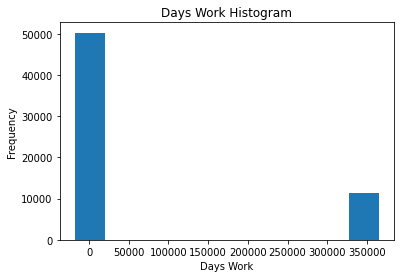

In [22]:
train_ds['DAYS_WORK'].plot.hist(title = 'Days Work Histogram');
plt.xlabel('Days Work');

In [23]:
anom = train_ds[train_ds['DAYS_WORK'] == 365243]
non_anom = train_ds[train_ds['DAYS_WORK'] != 365243]

print('There are %d anomalous days of work' % len(anom))
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))


There are 11253 anomalous days of work
The non-anomalies default on 8.74% of loans
The anomalies default on 5.15% of loans


### Fill nan to training dataset

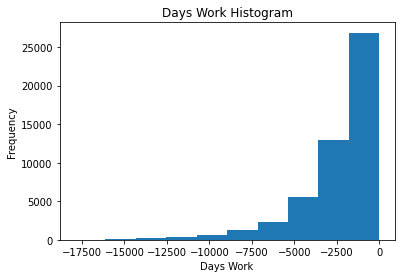

In [24]:
train_ds['DAYS_WORK_ANOM'] = train_ds["DAYS_WORK"] == 365243
train_ds['DAYS_WORK'].replace({365243: np.nan}, inplace = True)

train_ds['DAYS_WORK'].plot.hist(title = 'Days Work Histogram');
plt.xlabel('Days Work');

### Fill nan to test dataset

In [25]:
test_ds['DAYS_WORK_ANOM'] = test_ds["DAYS_WORK"] == 365243
test_ds["DAYS_WORK"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (test_ds["DAYS_WORK_ANOM"].sum(), len(test_ds)))

There are 2727 anomalies in the test data out of 14761 entries


## Corellation

Finding correlation for each feautures

In [26]:
correlations = train_ds.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(12))
print('\nMost Negative Correlations:\n', correlations.head(12))

Most Positive Correlations:
 HOUSING_TYPE_With parents                  0.023800
HOUSING_TYPE_Rented apartment              0.028558
FAMILY_STATUS_Single / not married         0.029927
FAMILY_STATUS_Civil marriage               0.030607
DAYS_REGISTRATION                          0.039037
EDUCATION_Secondary / secondary special    0.054553
DAYS_ID_CHANGE                             0.055748
GENDER                                     0.059428
INCOME_TYPE_Working                        0.061628
DAYS_WORK                                  0.071475
DAYS_AGE                                   0.083524
TARGET                                     1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SCORE_3                  -0.182254
EXT_SCORE_1                  -0.175235
EXT_SCORE_2                  -0.159431
EDUCATION_Higher education   -0.061117
INCOME_TYPE_Pensioner        -0.051060
DAYS_WORK_ANOM               -0.050948
ORGANIZATION_TYPE_NA1        -0.050948
PRICE          

## `DAYS_AGE`

**Find the correlation of the positive `DAYS_AGE` and target**

The actual values of `DAYS_AGE` is negative means the actual corellation is negative, means it has negative linear relationship with the target as the client gets older

In [27]:
train_ds['DAYS_AGE'] = abs(train_ds['DAYS_AGE'])
train_ds['DAYS_AGE'].corr(train_ds['TARGET'])

-0.08352387107101562

### Cut `DAYS_AGE` into bin

In [28]:
age_data = train_ds.loc[:, ['TARGET', 'DAYS_AGE']]
age_data['YEARS_AGE'] = age_data.loc[:, 'DAYS_AGE'] / 365
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_AGE'], bins = np.linspace(20, 70, num = 11))
age_data

,TARGET,DAYS_AGE,YEARS_AGE,YEARS_BINNED
0,0,11539,31.613699,"(30.0, 35.0]"
1,0,15743,43.131507,"(40.0, 45.0]"
2,0,20775,56.917808,"(55.0, 60.0]"
3,0,20659,56.600000,"(55.0, 60.0]"
4,0,9013,24.693151,"(20.0, 25.0]"
...,...,...,...,...
61498,0,14268,39.090411,"(35.0, 40.0]"
61499,1,21582,59.128767,"(55.0, 60.0]"
61500,0,17729,48.572603,"(45.0, 50.0]"
61501,0,11258,30.843836,"(30.0, 35.0]"


Group train data by years binned and get the average

In [29]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_AGE,YEARS_AGE
YEARS_BINNED,,,
"(20.0, 25.0]",0.121351,8530.737281,23.371883
"(25.0, 30.0]",0.116578,10156.427807,27.825830
"(30.0, 35.0]",0.104777,11855.240113,32.480110
"(35.0, 40.0]",0.091319,13708.160069,37.556603
"(40.0, 45.0]",0.073847,15494.986508,42.452018
"(45.0, 50.0]",0.076879,17329.706409,47.478648
"(50.0, 55.0]",0.062618,19186.446046,52.565606
"(55.0, 60.0]",0.055498,20987.287036,57.499417
"(60.0, 65.0]",0.052767,22784.580982,62.423510


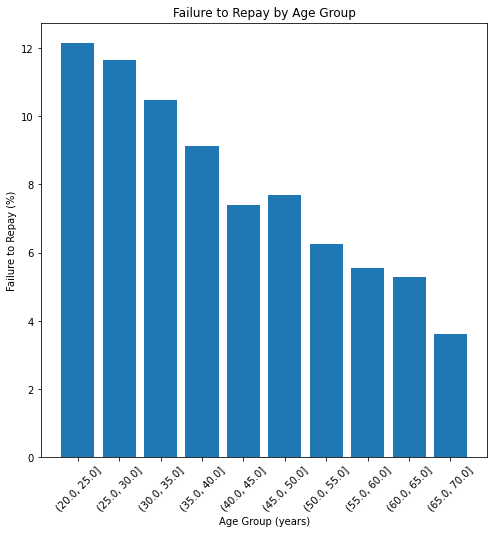

In [30]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

plt.xticks(rotation = 45)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

It is shown from the graph that *younger client* tend to fail to repay with approximately 8 to 12% probability

## `EXTERIOR SCORE`

`EXT_SCORE_1`, `EXT_SCORE_2`, and `EXT_SCORE_3` have the highest negative score

In [31]:
ext_data = train_ds[['TARGET', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3', 'DAYS_AGE']]
ext_data_corrs = ext_data.corr()

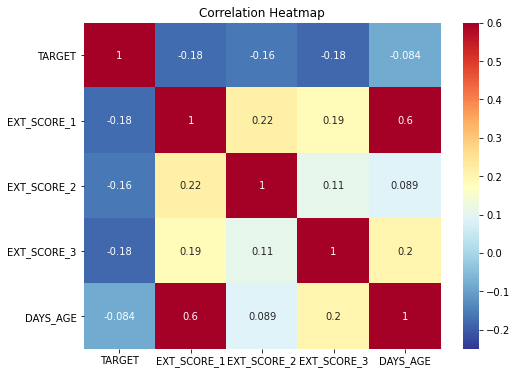

In [32]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

From the heat map we can see the correlation between `TARGET`, `EXT_SCORE_1`, `EXT_SCORE_2`, `EXT_SCORE_3`, and `DAYS_AGE`

All correlation between `TARGET` and all `EXT_SCORE` shows negative correlation values mean: 

*The higher the `EXT_SCORE` the more likely client will pay the loan*

# Feature Engineering

## Polynomial Features

In [33]:
# Make a new dataframe for polynomial features
poly_features = train_ds[['EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3', 'DAYS_AGE', 'TARGET']]
poly_features_test = test_ds[['EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3', 'DAYS_AGE']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [34]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape created: ', poly_features.shape)

Polynomial Features shape created:  (61503, 35)


### Created Features

In [35]:
poly_transformer.get_feature_names(input_features = ['EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3', 'DAYS_AGE'])[:15]

['1',
 'EXT_SCORE_1',
 'EXT_SCORE_2',
 'EXT_SCORE_3',
 'DAYS_AGE',
 'EXT_SCORE_1^2',
 'EXT_SCORE_1 EXT_SCORE_2',
 'EXT_SCORE_1 EXT_SCORE_3',
 'EXT_SCORE_1 DAYS_AGE',
 'EXT_SCORE_2^2',
 'EXT_SCORE_2 EXT_SCORE_3',
 'EXT_SCORE_2 DAYS_AGE',
 'EXT_SCORE_3^2',
 'EXT_SCORE_3 DAYS_AGE',
 'DAYS_AGE^2']

### Correlation between new features

In [36]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SCORE_1', 'EXT_SCORE_2', 
                                                                           'EXT_SCORE_3', 'DAYS_AGE']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()



In [37]:
# Display most negative and most positive
print('Most Positive Correlations:\n', poly_corrs.tail(12))
print('\nMost Negative Correlations:\n', poly_corrs.head(12))

Most Positive Correlations:
 EXT_SCORE_3^3            -0.130603
EXT_SCORE_1 DAYS_AGE     -0.114375
EXT_SCORE_1              -0.110966
EXT_SCORE_1^2 DAYS_AGE   -0.106637
EXT_SCORE_1 DAYS_AGE^2   -0.102101
EXT_SCORE_1^2            -0.101292
EXT_SCORE_1^3            -0.091727
DAYS_AGE                 -0.083524
DAYS_AGE^2               -0.081402
DAYS_AGE^3               -0.078467
TARGET                    1.000000
1                              NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SCORE_2 EXT_SCORE_3               -0.195651
EXT_SCORE_1 EXT_SCORE_2 EXT_SCORE_3   -0.195254
EXT_SCORE_2 EXT_SCORE_3 DAYS_AGE      -0.184426
EXT_SCORE_2^2 EXT_SCORE_3             -0.178032
EXT_SCORE_2 EXT_SCORE_3^2             -0.174632
EXT_SCORE_1 EXT_SCORE_3               -0.172598
EXT_SCORE_1 EXT_SCORE_2               -0.171310
EXT_SCORE_1 EXT_SCORE_2 DAYS_AGE      -0.161319
EXT_SCORE_1 EXT_SCORE_2^2             -0.160052
EXT_SCORE_1 EXT_SCORE_3 DAYS_AGE      -0.159699
EXT_SCORE_2 

### Putting New Features into Dataframe

In [38]:
train_ds.loc[:, 'LN_ID']

0        333538
1        406644
2        259130
3        411997
4        241559
          ...  
61498    251159
61499    441376
61500    184648
61501    313981
61502    293198
Name: LN_ID, Length: 61503, dtype: int64

In [39]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SCORE_1', 'EXT_SCORE_2', 
                                                                                'EXT_SCORE_3', 'DAYS_AGE']))

# Merge polynomial features into training dataframe
poly_features['LN_ID'] = train_ds.loc[:, 'LN_ID']
train_ds_poly = train_ds.merge(poly_features, on = 'LN_ID', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['LN_ID'] = test_ds['LN_ID']
test_ds_poly = test_ds.merge(poly_features_test, on = 'LN_ID', how = 'left')

# Align the dataframes
train_ds_poly, test_ds_poly = train_ds_poly.align(test_ds_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', train_ds_poly.shape)
print('Testing data with polynomial features shape:  ', test_ds_poly.shape)

Training data with polynomial features shape:  (61503, 139)
Testing data with polynomial features shape:   (14761, 139)


In [40]:
train_ds

,Unnamed: 0,LN_ID,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,INCOME_TYPE_Commercial associate,INCOME_TYPE_Pensioner,INCOME_TYPE_State servant,INCOME_TYPE_Unemployed,INCOME_TYPE_Working,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,FAMILY_STATUS_Civil marriage,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow,HOUSING_TYPE_Co-op apartment,HOUSING_TYPE_House / apartment,HOUSING_TYPE_Municipal apartment,HOUSING_TYPE_Office apartment,HOUSING_TYPE_Rented apartment,HOUSING_TYPE_With parents,WEEKDAYS_APPLY_FRIDAY,WEEKDAYS_APPLY_MONDAY,...,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_NA1,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,TARGET,DAYS_WORK_ANOM
0,201468,333538,1,0,1,67500.0,202500.0,10125.0,202500.0,11539,-921.0,-119.0,-2757,18,0.572805,0.608276,NaN,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
1,264803,406644,0,0,1,202500.0,976711.5,49869.0,873000.0,15743,-4482.0,-1797.0,-2455,14,0.655600,0.684298,NaN,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,137208,259130,0,0,0,180000.0,407520.0,25060.5,360000.0,20775,NaN,-8737.0,-4312,14,NaN,0.580687,0.749022,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
3,269220,411997,0,1,0,225000.0,808650.0,26086.5,675000.0,20659,-10455.0,-4998.0,-4010,10,NaN,0.623740,0.710674,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,122096,241559,1,1,0,135000.0,180000.0,9000.0,180000.0,9013,-1190.0,-3524.0,-1644,11,0.175511,0.492994,0.085595,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,130325,251159,0,1,2,360000.0,450000.0,44509.5,450000.0,14268,-5813.0,-2313.0,-2709,6,0.295858,0.104877,0.616122,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
61499,294665,441376,0,0,0,441000.0,904500.0,38452.5,904500.0,21582,NaN,-4106.0,-4191,12,0.693816,0.411595,0.239226,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

# Train the model

## Data Preprocessing

### Preprocess Normal Dataset

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the training data
if 'TARGET' in train_ds:
    train = train_ds.drop(columns = ['TARGET'])
else:
    train = train_ds.copy()


# Feature names
features = list(train.columns)

# Copy of the testing data
test = test_ds.copy()

# Median imputation of missing values
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test_ds)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (61503, 104)
Testing data shape:  (14761, 104)


### Preprocess Features Engineered

In [42]:
poly_features_names = list(train_ds_poly.columns)

# Impute the polynomial features
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')

poly_features = imputer.fit_transform(train_ds_poly)
poly_features_test = imputer.transform(test_ds_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

print('Training data shape: ', poly_features.shape)
print('Testing data shape: ', poly_features_test.shape)

Training data shape:  (61503, 139)
Testing data shape:  (14761, 139)


## Training (Logistic Regression)

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# Make predictions on the test data
log_reg_pred = log_reg.predict_proba(test)[:, 1]
log_reg.score(test, test_labels)

0.9185014565408848

## Training (Logistic Regression Features Engineered)

In [45]:
log_reg_poly = LogisticRegression(C = 0.0001)
log_reg_poly.fit(poly_features, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Make predictions on the test data
log_reg_poly_pred = log_reg_poly.predict_proba(poly_features_test)[:, 1]
log_reg_poly.score(poly_features_test, test_labels)

0.9185014565408848

## Training (Random Forest)

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [48]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.4s finished


In [49]:
# Make predictions on the test data
random_forest_pred = random_forest.predict_proba(test)[:, 1]
random_forest.score(test, test_labels)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


0.9182982182778945

## Training (Random Forest Features Engineered) 

In [50]:
# Train on the training data
random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
random_forest_poly.fit(poly_features, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [51]:
# Make predictions on the test data
random_forest_poly_pred = random_forest_poly.predict_proba(poly_features_test)[:, 1]
random_forest_poly.score(poly_features_test, test_labels)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


0.888015717092338

## Conclusion

It is shown that **Logistic Regression perform better then Random Forest**, and Random Forest is perform worse when fed with polynomial features

# Features Importance

In [52]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

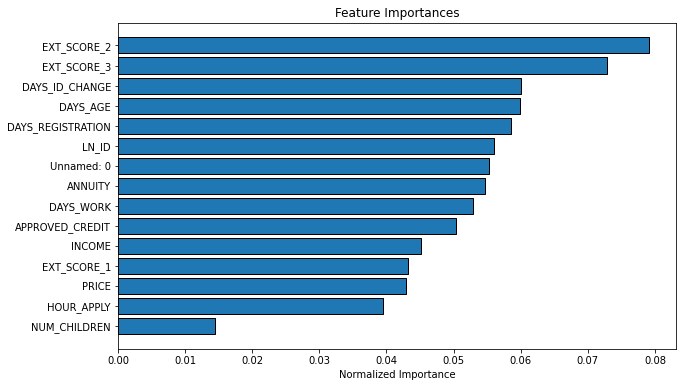

In [53]:
feature_importances_sorted = plot_feature_importances(feature_importances)

#LGBM Model and AUC Score

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [55]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `LN_ID` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['LN_ID']
    test_ids = test_features['LN_ID']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['LN_ID', 'TARGET'])
    test_features = test_features.drop(columns = ['LN_ID'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'LN_ID': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [56]:
submission, fi, metrics = model(train_ds, test_ds)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (61503, 103)
Testing Data Shape:  (14761, 103)
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[66]	train's binary_logloss: 0.546926	train's auc: 0.807545	valid's binary_logloss: 0.55946	valid's auc: 0.756174
Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.470816	train's auc: 0.874652	valid's binary_logloss: 0.520913	valid's auc: 0.736551
Early stopping, best iteration is:
[127]	train's binary_logloss: 0.503722	train's auc: 0.845141	valid's binary_logloss: 0.540811	valid's auc: 0.738315
Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.475806	train's auc: 0.873329	valid's binary_logloss: 0.517413	valid's auc: 0.762629
Early stopping, best iteration is:
[123]	train's binary_logloss: 0.511209	train's auc: 0.841169	valid's binary_logloss: 0.538965	valid's auc: 0.765474
Training until validation scores don't improve for 100 roun

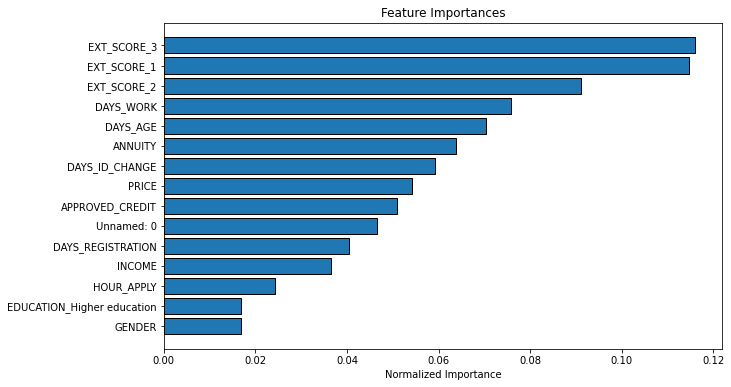

In [57]:
fi_sorted = plot_feature_importances(fi)